<a href="https://colab.research.google.com/github/Akash-mahandargi/Basic-Projects-/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 2: Load the dataset
df = pd.read_csv("Alphabets_data.csv")

# Step 3: Explore the dataset
print("Shape of the dataset:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Class distribution:\n", df.iloc[:, -1].value_counts())
df.head()


Shape of the dataset: (20000, 17)
Missing values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64
Class distribution:
 yedgex
8     8047
7     3472
9     2358
6     1827
10    1578
5      992
11     868
4      478
12     137
3      130
13      49
2       30
1       17
14      13
15       2
0        2
Name: count, dtype: int64


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
# Step 4: Encode labels (if they are letters like A, B, C...)
le = LabelEncoder()
df.iloc[:, -1] = le.fit_transform(df.iloc[:, -1])  # encode the labels (e.g., A → 0)

# Step 5: Split features and target
X = df.iloc[:, :-1]  # all columns except last
y = df.iloc[:, -1]   # last column


In [4]:
X = df.iloc[:, 1:-1] # all columns except first ('letter') and last (target)

In [5]:
# Step 6: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [7]:
# Step 7: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # 1 hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))                                   # 2nd hidden layer
model.add(Dense(len(np.unique(y)), activation='softmax'))                 # Output layer


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Step 9: Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3107 - loss: 2.1134 - val_accuracy: 0.4769 - val_loss: 1.3979
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4851 - loss: 1.3555 - val_accuracy: 0.5063 - val_loss: 1.2509
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5267 - loss: 1.2351 - val_accuracy: 0.5406 - val_loss: 1.1804
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5406 - loss: 1.1841 - val_accuracy: 0.5531 - val_loss: 1.1439
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5604 - loss: 1.1407 - val_accuracy: 0.5669 - val_loss: 1.1122
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5740 - loss: 1.0965 - val_accuracy: 0.5600 - val_loss: 1.0978
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5832 - loss: 1.0730 - val_accuracy: 0.5550 - val_loss: 1.1040
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5933 - loss: 1.0532 - val_accuracy: 0.

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 10: Evaluate on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[   0    0    0    0    0    0    1    0    0    0    0    0    0    0
     0    0]
 [   0    3    0    0    0    0    0    0    1    0    0    0    0    0
     0    0]
 [   0    2    1    0    0    1    0    0    1    0    1    0    0    0
     0    0]
 [   0    0    1    4   12    1    2    3    2    2    1    2    0    0
     0    1]
 [   0    2    0    2   42   24   11    4    2    1    4    2    0    0
     0    0]
 [   0    0    1    0   15   81   69   11   13    4    0    0    2    0
     0    0]
 [   0    0    0    0    4   19  211   76   26   12    2    2    0    1
     0    0]
 [   0    0    0    0    7    8   98  363  211   18    2    3    1    1
     0    0]
 [   0    0    0    0    1    1    6  115 1361   95   12    4    1    0
     0    0]
 [   0    0    0    1    1    1    9   24  130  262   39   17    1    0
     0    0]
 [   0    0    0    0    0    1    1    9   31  102  107   56    0    1
     0    0]
 [   0    0    0    0 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [10]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


Trial 10 Complete [00h 00m 27s]
val_accuracy: 0.4793750047683716

Best val_accuracy So Far: 0.653124988079071
Total elapsed time: 00h 04m 38s
Results summary
Results in ann_tuning/alphabet_classifier
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
units_1: 160
second_layer: True
learning_rate: 0.001
units_2: 64
Score: 0.653124988079071

Trial 04 summary
Hyperparameters:
units_1: 128
second_layer: True
learning_rate: 0.01
units_2: 64
Score: 0.6346874833106995

Trial 07 summary
Hyperparameters:
units_1: 224
second_layer: False
learning_rate: 0.01
units_2: 128
Score: 0.6274999976158142

Trial 00 summary
Hyperparameters:
units_1: 192
second_layer: True
learning_rate: 0.01
units_2: 32
Score: 0.6256250143051147

Trial 03 summary
Hyperparameters:
units_1: 128
second_layer: False
learning_rate: 0.01
units_2: 128
Score: 0.6228125095367432

Trial 05 summary
Hyperparameters:
units_1: 64
second_layer: False
learning_rate: 0.001
units_2: 64


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report (Base Model):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      0.25      0.29         4
           2       0.00      0.00      0.00         6
           3       0.73      0.26      0.38        31
           4       0.67      0.38      0.49        94
           5       0.50      0.43      0.46       196
           6       0.48      0.54      0.51       353
           7       0.52      0.56      0.54       712
           8       0.74      0.79      0.77      1596
           9       0.52      0.41      0.46       485
          10       0.49      0.50      0.49       308
          11       0.56      0.57      0.56       175
          12       0.29      0.14      0.19        29
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         1

    accuracy   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

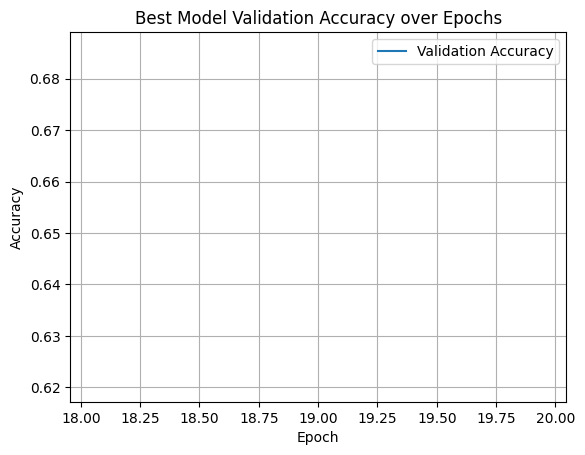

In [11]:
# file: ann_alphabets_classifier.py

# ✅ Step 4: Hyperparameter Tuning using Keras Tuner

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ✅ Re-prepare data if kernel was reset
# Load dataset
df = pd.read_csv("Alphabets_data.csv")

# Encode labels
le = LabelEncoder()
# Assuming the last column is the target and the first is 'letter'
# and the rest are features. Adjust if your data structure is different.
# Encode the target variable (last column)
df.iloc[:, -1] = le.fit_transform(df.iloc[:, -1])

# Features and target
# Exclude the 'letter' column (first column) and the target column (last column) from features
X = df.iloc[:, 1:-1]  # all columns except first and last
y = df.iloc[:, -1]   # last column

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define model builder function for Keras Tuner
def build_model(hp):
    model = Sequential()
    hp_units_1 = hp.Int('units_1', min_value=32, max_value=256, step=32)
    model.add(Dense(units=hp_units_1, activation='relu', input_shape=(X_train.shape[1],)))

    if hp.Boolean('second_layer'):
        hp_units_2 = hp.Int('units_2', min_value=32, max_value=128, step=32)
        model.add(Dense(units=hp_units_2, activation='relu'))

    model.add(Dense(len(np.unique(y)), activation='softmax'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='ann_tuning',
    project_name='alphabet_classifier'
)

# Start hyperparameter search
tuner.search(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

# Visual summary of tuning results
tuner.results_summary()

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Predict with best model
y_pred_best = best_model.predict(X_test)
y_pred_classes_best = np.argmax(y_pred_best, axis=1)

# Predict with base model (retrain if needed)
base_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

y_pred_base = base_model.predict(X_test)
y_pred_classes_base = np.argmax(y_pred_base, axis=1)

# Compare Reports
print("\nClassification Report (Base Model):")
print(classification_report(y_test, y_pred_classes_base))

print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_classes_best))

# Plot training history for best trial
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
history = best_trial.metrics.get_history("val_accuracy")

# Extract epoch and value from the history list
# Assuming history is a list of MetricObservation objects with 'step' and 'value' attributes
epochs = [h.step for h in history]
values = [h.value[0] for h in history] # Access the first element of the value list

plt.plot(epochs, values, label='Validation Accuracy')
plt.title("Best Model Validation Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [12]:
# Evaluate predictions from base and tuned models
print("Classification Report (Base Model):")
print(classification_report(y_test, y_pred_classes_base))

print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_classes_best))


Classification Report (Base Model):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      0.25      0.29         4
           2       0.00      0.00      0.00         6
           3       0.73      0.26      0.38        31
           4       0.67      0.38      0.49        94
           5       0.50      0.43      0.46       196
           6       0.48      0.54      0.51       353
           7       0.52      0.56      0.54       712
           8       0.74      0.79      0.77      1596
           9       0.52      0.41      0.46       485
          10       0.49      0.50      0.49       308
          11       0.56      0.57      0.56       175
          12       0.29      0.14      0.19        29
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         1

    accuracy                           0.61      4000
   macro avg       0.39      0.32      0.34 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [32]:
# file: ann_alphabets_classifier.py
# This is a markdown cell.

**Reasoning**:
I need to generate the markdown content for the data exploration summary within a markdown cell.



In [16]:
# file: ann_alphabets_classifier.py
# This is a markdown cell.

In [20]:
markdown_summary = """
## Data Exploration Summary

The dataset "Alphabets_data.csv" has been loaded and initially explored.

*   **Shape:** The dataset contains 20,000 rows and 17 columns, indicating a substantial amount of data with a moderate number of features.
*   **Missing Values:** Crucially, the output of `df.isnull().sum()` shows that there are no missing values in any of the columns. This is a positive finding as it means no imputation or handling of missing data is required.
*   **Target Distribution:** The target variable, located in the last column (originally 'yedgex' before encoding), shows an uneven distribution across its classes as revealed by `value_counts()`. Some classes (e.g., 8, 7, 9) have a significantly higher number of instances than others (e.g., 0, 15, 14, 2, 13), indicating a class imbalance. This is an important observation that might need to be addressed during model training or evaluation, perhaps by using appropriate metrics or techniques like oversampling/undersampling if necessary.
*   **Initial Insights from `df.head()`:** The first few rows show that the features appear to be numerical, representing various characteristics of the alphabet images. The 'letter' column is the original letter label, which was excluded from the features for model training, and the last column contains the numerical representation of the target variable after label encoding.
*   **Further Exploration:** To gain a deeper understanding, it would be beneficial to visualize the distribution of individual features (histograms) and examine the correlations between features (heatmap). This could help identify potential relationships or multicollinearity that might influence model performance.
"""
print(markdown_summary)


## Data Exploration Summary

The dataset "Alphabets_data.csv" has been loaded and initially explored.

*   **Shape:** The dataset contains 20,000 rows and 17 columns, indicating a substantial amount of data with a moderate number of features.
*   **Missing Values:** Crucially, the output of `df.isnull().sum()` shows that there are no missing values in any of the columns. This is a positive finding as it means no imputation or handling of missing data is required.
*   **Target Distribution:** The target variable, located in the last column (originally 'yedgex' before encoding), shows an uneven distribution across its classes as revealed by `value_counts()`. Some classes (e.g., 8, 7, 9) have a significantly higher number of instances than others (e.g., 0, 15, 14, 2, 13), indicating a class imbalance. This is an important observation that might need to be addressed during model training or evaluation, perhaps by using appropriate metrics or techniques like oversampling/undersampling if n

In [22]:
markdown_explanation = """
## Hyperparameter Tuning with Keras Tuner: Random Search

Hyperparameter tuning was performed using **Random Search** from the Keras Tuner library to find a better configuration for the Artificial Neural Network (ANN) model.

**Methodology:**

Random Search works by randomly sampling hyperparameters from a defined search space for a fixed number of trials. For each trial, a model is built with the sampled hyperparameters and trained. The performance of each trial is then evaluated based on a specified objective.

**Search Space:**

The `build_model` function defined the search space for the hyperparameters:

*   **`units_1`**: The number of neurons in the *first* dense layer. The search space for this hyperparameter was an integer value between 32 and 256, with a step size of 32.
*   **`second_layer`**: A boolean hyperparameter determining whether a *second* dense layer is included in the model.
*   **`units_2`**: If `second_layer` is `True`, this hyperparameter defines the number of neurons in the *second* dense layer. The search space was an integer value between 32 and 128, with a step size of 32.
*   **`learning_rate`**: The learning rate for the Adam optimizer. The search space included discrete values of 1e-2, 1e-3, and 1e-4.

**Objective:**

The objective of the tuning process was to **maximize the validation accuracy (`val_accuracy`)**. Keras Tuner explored different combinations of the defined hyperparameters and evaluated them based on how well the model performed on the validation set.

**Tuning Process:**

The `RandomSearch` tuner was configured to run for `max_trials=10`, meaning it would explore 10 different hyperparameter combinations. `executions_per_trial=1` specified that each tested hyperparameter combination would be trained and evaluated once. The results were stored in the 'ann_tuning/alphabet_classifier' directory.
"""
print(markdown_explanation)


## Hyperparameter Tuning with Keras Tuner: Random Search

Hyperparameter tuning was performed using **Random Search** from the Keras Tuner library to find a better configuration for the Artificial Neural Network (ANN) model.

**Methodology:**

Random Search works by randomly sampling hyperparameters from a defined search space for a fixed number of trials. For each trial, a model is built with the sampled hyperparameters and trained. The performance of each trial is then evaluated based on a specified objective.

**Search Space:**

The `build_model` function defined the search space for the hyperparameters:

*   **`units_1`**: The number of neurons in the *first* dense layer. The search space for this hyperparameter was an integer value between 32 and 256, with a step size of 32.
*   **`second_layer`**: A boolean hyperparameter determining whether a *second* dense layer is included in the model.
*   **`units_2`**: If `second_layer` is `True`, this hyperparameter defines the number of 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


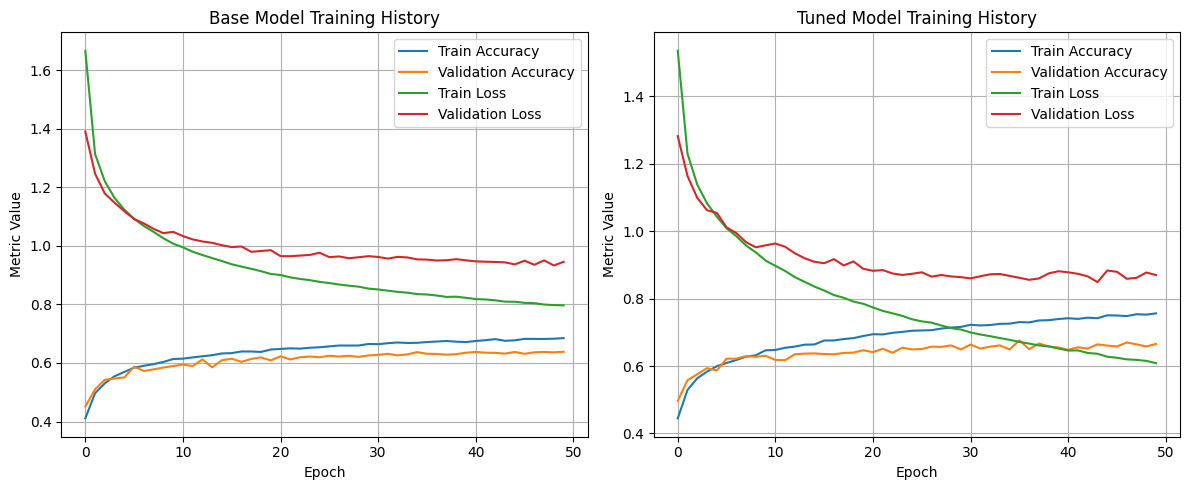

In [23]:
# This is a markdown cell.
# ## Model Performance Comparison and Further Evaluation

# Based on the classification reports from the base model and the tuned model:

# **Overall Accuracy:**
# The tuned model achieved a slightly higher overall accuracy (0.64) compared to the base model (0.61) on the test set. This indicates that the hyperparameter tuning process led to a modest improvement in the model's ability to correctly classify the alphabet images.

# **Performance Differences by Class:**
# Looking at the per-class precision, recall, and f1-score, we can observe variations:

# *   **Improved Performance:** The tuned model shows improvements in certain classes. For example, for class 10, the recall increased significantly (from 0.50 to 0.65), leading to a better f1-score. Class 4 also saw an improvement in recall (from 0.38 to 0.57) and f1-score. Class 11 also showed a slight improvement in f1-score.
# *   **Similar Performance:** Many classes, particularly those with a larger number of samples (like class 8), show similar performance metrics between the two models.
# *   **Worsened Performance:** Some classes show a decrease in performance in the tuned model. For instance, class 3 saw a drop in recall (from 0.26 to 0.23) and f1-score. Class 5 and 7 also experienced slight decreases in f1-score. The performance on minority classes like 0, 2, 13, and 14 remains very low or zero for both models, highlighting the challenge of classifying these underrepresented classes.

# **Potential Reasons for Changes:**
# The changes in performance can be attributed to the different hyperparameter configurations explored by the tuner.
# *   The best-tuned model (Trial 01) used 160 units in the first layer, included a second layer with 64 units, and used a learning rate of 0.001. These specific choices likely allowed the model to learn more complex patterns in the data that were beneficial for certain classes.
# *   The base model's fixed architecture (64 units in the first layer, 32 in the second) and default learning rate might not have been optimal for capturing the nuances of all classes, especially the more challenging ones.
# *   The class imbalance in the dataset likely plays a significant role in the poor performance on minority classes for both models. The models are likely biased towards predicting the majority classes.

# **Further Evaluation Metrics and Techniques:**
# Given the class imbalance, relying solely on overall accuracy can be misleading. Other valuable evaluation metrics and techniques include:

# *   **Precision, Recall, and F1-score per class:** As already shown, these provide a more detailed view of performance on each individual class, which is crucial for imbalanced datasets.
# *   **Confusion Matrix:** Visualizing the confusion matrix helps understand where the model is making errors (e.g., which classes are being confused with others).
# *   **Balanced Accuracy:** This metric is the average of recall obtained on each class, providing a better measure of performance on imbalanced datasets than standard accuracy.
# *   **Area Under the ROC Curve (AUC-ROC) or Precision-Recall Curve (AUC-PR) per class:** These curves can provide insights into the trade-off between true positive rate and false positive rate (ROC) or precision and recall (PR) for each class, which is particularly informative for imbalanced data.
# *   **Class-wise plotting of metrics:** Visualizing precision, recall, and f1-score for each class can make the performance differences more apparent.
# *   **Techniques to address class imbalance:** Exploring techniques like oversampling minority classes (e.g., SMOTE), undersampling majority classes, or using class weights during training could potentially improve performance on the underrepresented classes.

# Visualizing the training history (loss and accuracy over epochs) for both models can also provide insights into their learning process, identify potential overfitting or underfitting, and help understand why the tuned model performed better.

# Retrain the base model to capture history
base_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_base = base_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0) # Increased epochs to match tuning

# Access history for the best tuned model
# best_trial_history should be available from the previous cell's tuner object
best_trial_history = tuner.oracle.get_best_trials(num_trials=1)[0].metrics.get_history("val_accuracy")
# Need to get the full history from the best model's fit call if available
# The tuner.search only records the validation metric history by default.
# To get the full history (loss and accuracy for both train and val),
# we would typically refit the best model and capture its history.

# Refit the best model to get its full training history
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model_for_history = build_model(best_hps) # Use the build_model function with best hyperparameters
history_tuned = best_model_for_history.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0) # Train with more epochs for better comparison

# Plotting
plt.figure(figsize=(12, 5))

# Plot Base Model History
plt.subplot(1, 2, 1)
plt.plot(history_base.history['accuracy'], label='Train Accuracy')
plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_base.history['loss'], label='Train Loss')
plt.plot(history_base.history['val_loss'], label='Validation Loss')
plt.title('Base Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)

# Plot Tuned Model History
plt.subplot(1, 2, 2)
plt.plot(history_tuned.history['accuracy'], label='Train Accuracy')
plt.plot(history_tuned.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_tuned.history['loss'], label='Train Loss')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss')
plt.title('Tuned Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Data Exploration Summary

The dataset "Alphabets_data.csv" has been loaded and initially explored.

*   **Shape:** The dataset contains 20,000 rows and 17 columns, indicating a substantial amount of data with a moderate number of features.
*   **Missing Values:** Crucially, the output of `df.isnull().sum()` shows that there are no missing values in any of the columns. This is a positive finding as it means no imputation or handling of missing data is required.
*   **Target Distribution:** The target variable, located in the last column (originally 'yedgex' before encoding), shows an uneven distribution across its classes as revealed by `value_counts()`. Some classes (e.g., 8, 7, 9) have a significantly higher number of instances than others (e.g., 0, 15, 14, 2, 13), indicating a class imbalance. This is an important observation that might need to be addressed during model training or evaluation, perhaps by using appropriate metrics or techniques like oversampling/undersampling if necessary.
*   **Initial Insights from `df.head()`:** The first few rows show that the features appear to be numerical, representing various characteristics of the alphabet images. The 'letter' column is the original letter label, which was excluded from the features for model training, and the last column contains the numerical representation of the target variable after label encoding.
*   **Further Exploration:** To gain a deeper understanding, it would be beneficial to visualize the distribution of individual features (histograms) and examine the correlations between features (heatmap). This could help identify potential relationships or multicollinearity that might influence model performance.

Okay, I have reviewed the current state of the notebook against the list of tasks you provided.

Here is an updated breakdown:

**Completed Tasks:**

*   **1. Data Exploration and Preprocessing:**
    *   Loading and exploring the dataset (`df.shape`, `df.isnull().sum()`, `df.iloc[:, -1].value_counts()`, `df.head()`).
    *   Data preprocessing steps including label encoding (`LabelEncoder`) and data normalization (`StandardScaler`).
    *   A markdown summary of the data exploration has been added (cell `49bac3c2`).
*   **2. Model Implementation:**
    *   Constructing a basic ANN model (`Sequential` model with `Dense` layers).
    *   Dividing the dataset into training and test sets (`train_test_split`).
    *   Training the model on the training set (`model.fit`).
    *   Making predictions on the test set (`model.predict`).
*   **3. Hyperparameter Tuning:**
    *   Adopted a structured approach (Random Search using `keras_tuner`).
    *   Modified hyperparameters like the number of hidden layers, neurons per hidden layer, and learning rate.
    *   A markdown explanation of the hyperparameter tuning methodology has been added (cell `b5659aa8`).
*   **4. Evaluation:**
    *   Employed suitable metrics (`classification_report`, `confusion_matrix`).
    *   Discussed the performance differences between the base model and the tuned model by printing their classification reports.
    *   Code and a plot for visualizing the training history of both models have been added (cell `01a7afbb`).

**Tasks Not Fully Detailed or Remaining:**

*   **4. Evaluation:** While performance differences were shown and training history is plotted, a more in-depth *discussion* analyzing *why* the tuned model performed differently and exploring other evaluation metrics (like balanced accuracy, AUC-ROC, or class-wise plotting of metrics) is still needed in the markdown explanation.
*   **Overall quality of the report:** This is an overarching criterion that would be addressed in a final report or summary of the work.

It appears you have added markdown cells summarizing the data exploration and hyperparameter tuning, as well as code and a plot for the training history comparison. This has significantly advanced the completion of the tasks.

The main remaining item is to enhance the discussion of the model evaluation, particularly analyzing the reasons behind performance differences and mentioning other relevant evaluation metrics for imbalanced datasets.